Jinyoung and I's goal for this project was to implement some machine learning algorithms on astronomical data from the Gaia dataset to provide a  visualization for the M13 globular cluster 🌌

 🧮Here, we took coordinates from M13's Wikipedia page (dec and ra), and converted them to degrees. 

In [1]:
from astropy import units as u 
from astropy.coordinates import SkyCoord 
c = SkyCoord('16h41m41s', '+36d27m35.5',  frame = 'icrs')

In [2]:
c.dec.degree

36.45986111111112

In [3]:
c.ra.degree

250.4208333333333

👩‍💻 Our next step was to download that dataset to the Jupyter Notebook, which we've done below. We started out with a pretty basic dataset. 

In [4]:
import pandas as pd

In [5]:
#downloading the first gaia data set 

data = pd.read_csv("/Users/xyz/Desktop/1613491863611O-result.csv")

In [6]:
data

,source_id,ra,dec,parallax,parallax_error,phot_g_mean_mag,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error
0,1328058077530016896,250.389770,36.470374,0.111771,0.127931,16.852844,0.829334,NaN,NaN
1,1328058077530017024,250.389813,36.470071,0.380537,0.283754,18.468966,NaN,NaN,NaN
2,1328058077530019584,250.390965,36.467681,0.043723,0.222828,18.155495,NaN,NaN,NaN
3,1328058077530024704,250.388000,36.466137,0.931596,0.277821,18.038760,0.792616,NaN,NaN
4,1328058077530032896,250.387635,36.465370,0.315664,0.245778,18.464962,0.822241,NaN,NaN
...,...,...,...,...,...,...,...,...,...
495,1328058180611932544,250.395020,36.483430,0.814745,0.444887,18.799830,NaN,NaN,NaN
496,1328058180611932928,250.391467,36.479835,1.561952,0.350615,18.768997,NaN,NaN,NaN
497,1328058180615227648,250.408317,36.480443,0.355121,0.046378,13.908892,0.997310,NaN,NaN
498,1328058180615228544,250.399846,36.472359,0.543278,0.209087,15.987268,0.918439,NaN,NaN


In [7]:
data.parallax

0      0.111771
1      0.380537
2      0.043723
3      0.931596
4      0.315664
         ...   
495    0.814745
496    1.561952
497    0.355121
498    0.543278
499    0.093465
Name: parallax, Length: 500, dtype: float64

🤩 Next, we wrote a function to convert the parallaxes to distances using the equations below:

Given a baseline of 1 AU,

Distance = 1 AU / tan{parallax}

We were able to simplify this to just 1/parallax because of a calculus theorem.

In [8]:
#code to convert parallaxes to distances! 
import math
import astropy
from astropy import units as u

def calculate_distance(parallax):
    b = 1
    d = b/(parallax)
    return d 


In [9]:
#function to calculate the distances ! 
distances = []
for x in data.parallax:
    # You need to convert x from milli arc sec to radians first!
    x *= 4.8481368110954E-9
    distances.append(calculate_distance(x))
data['distance'] = distances

😎 Our first visualization of the M13 globular cluster - plotted declination vs. ra 

<IPython.core.display.Javascript object>


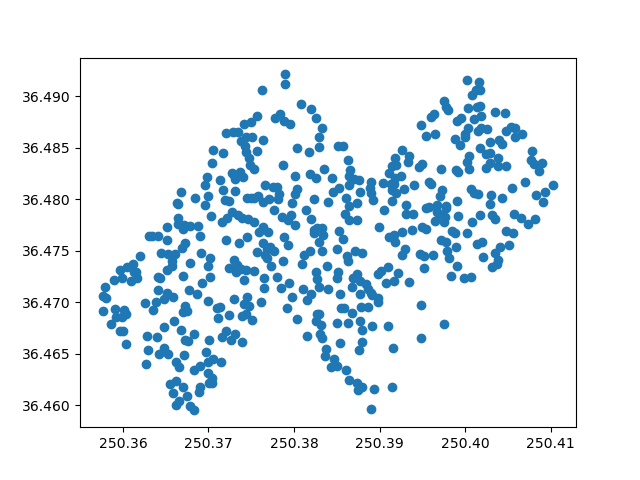

In [72]:

%matplotlib notebook 
import matplotlib.pyplot as plt 
plt.scatter(data.ra, data.dec) 


🎮 Played around with the data a bit and graphed a histogram of the apparent magnitude, g, of M13 

<IPython.core.display.Javascript object>


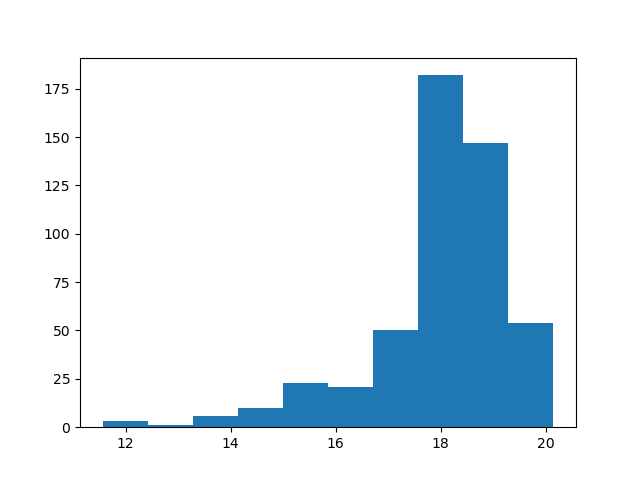

(array([  3.,   1.,   6.,  10.,  23.,  21.,  50., 182., 147.,  54.]),
 array([11.56042  , 12.4191973, 13.2779746, 14.1367519, 14.9955292,
        15.8543065, 16.7130838, 17.5718611, 18.4306384, 19.2894157,
        20.148193 ]),
 <BarContainer object of 10 artists>)

In [11]:


%matplotlib notebook 
plt.hist(data.phot_g_mean_mag)

In [12]:
data

,source_id,ra,dec,parallax,parallax_error,phot_g_mean_mag,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error,distance
0,1328058077530016896,250.389770,36.470374,0.111771,0.127931,16.852844,0.829334,NaN,NaN,1.845416e+09
1,1328058077530017024,250.389813,36.470071,0.380537,0.283754,18.468966,NaN,NaN,NaN,5.420358e+08
2,1328058077530019584,250.390965,36.467681,0.043723,0.222828,18.155495,NaN,NaN,NaN,4.717563e+09
3,1328058077530024704,250.388000,36.466137,0.931596,0.277821,18.038760,0.792616,NaN,NaN,2.214103e+08
4,1328058077530032896,250.387635,36.465370,0.315664,0.245778,18.464962,0.822241,NaN,NaN,6.534313e+08
...,...,...,...,...,...,...,...,...,...,...
495,1328058180611932544,250.395020,36.483430,0.814745,0.444887,18.799830,NaN,NaN,NaN,2.531649e+08
496,1328058180611932928,250.391467,36.479835,1.561952,0.350615,18.768997,NaN,NaN,NaN,1.320558e+08
497,1328058180615227648,250.408317,36.480443,0.355121,0.046378,13.908892,0.997310,NaN,NaN,5.808295e+08
498,1328058180615228544,250.399846,36.472359,0.543278,0.209087,15.987268,0.918439,NaN,NaN,3.796672e+08


In [13]:
import numpy as np

In [14]:
data['M_g'] = data.phot_g_mean_mag - 5*np.log10(data.distance*4.84814e-6)+5

In [15]:
data

,source_id,ra,dec,parallax,parallax_error,phot_g_mean_mag,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error,distance,M_g
0,1328058077530016896,250.389770,36.470374,0.111771,0.127931,16.852844,0.829334,NaN,NaN,1.845416e+09,2.094497
1,1328058077530017024,250.389813,36.470071,0.380537,0.283754,18.468966,NaN,NaN,NaN,5.420358e+08,6.370950
2,1328058077530019584,250.390965,36.467681,0.043723,0.222828,18.155495,NaN,NaN,NaN,4.717563e+09,1.359031
3,1328058077530024704,250.388000,36.466137,0.931596,0.277821,18.038760,0.792616,NaN,NaN,2.214103e+08,7.884896
4,1328058077530032896,250.387635,36.465370,0.315664,0.245778,18.464962,0.822241,NaN,NaN,6.534313e+08,5.961087
...,...,...,...,...,...,...,...,...,...,...,...
495,1328058180611932544,250.395020,36.483430,0.814745,0.444887,18.799830,NaN,NaN,NaN,2.531649e+08,8.354937
496,1328058180611932928,250.391467,36.479835,1.561952,0.350615,18.768997,NaN,NaN,NaN,1.320558e+08,9.737334
497,1328058180615227648,250.408317,36.480443,0.355121,0.046378,13.908892,0.997310,NaN,NaN,5.808295e+08,1.660773
498,1328058180615228544,250.399846,36.472359,0.543278,0.209087,15.987268,0.918439,NaN,NaN,3.796672e+08,4.662377


🥳 Our first visualization of the M13 Globular Cluster! 

<IPython.core.display.Javascript object>


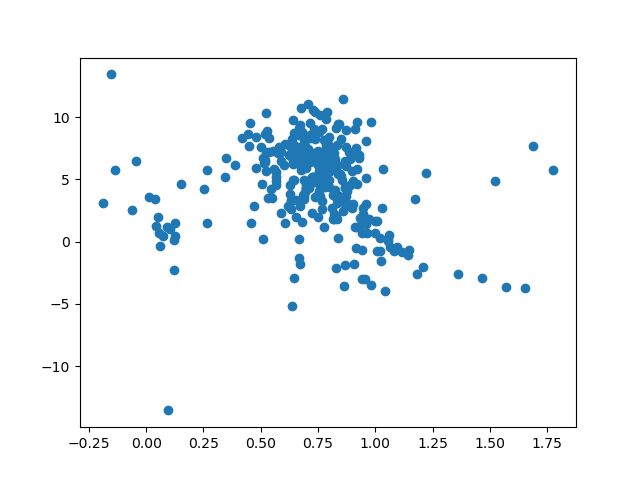

In [16]:

%matplotlib notebook 
plt.scatter(data.bp_rp, data.M_g)

In [17]:
import numpy as np
import pandas as pd

🔭 Next, we imported a more precise dataset from the Gaia archive that had more values for us to look at. 

In [18]:
gaia_2 = pd.read_csv("/Users/xyz/Desktop/Gaia_Data_2.csv")

In [19]:
gaia_2

,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp
0,250.210403,0.155934,36.506006,0.179071,0.872153,0.201508,18.970665,19.559586,18.175150,1.384436,0.588921,0.795515
1,250.233695,0.165174,36.519477,0.193368,0.089205,0.214014,19.038458,19.216787,18.547806,0.668982,0.178329,0.490652
2,250.433752,0.457370,36.539471,0.453590,0.752001,0.530961,20.140720,19.898542,19.235739,0.662804,-0.242178,0.904982
3,250.514669,0.148344,36.346602,0.182498,0.201993,0.202575,18.593836,18.786358,18.118933,0.667425,0.192522,0.474903
4,250.757883,0.314347,36.595053,0.379377,0.645419,0.409077,19.861362,20.309706,19.060225,1.249481,0.448343,0.801138
...,...,...,...,...,...,...,...,...,...,...,...,...
16041,250.213732,0.267580,36.637694,0.308502,1.673577,0.346489,19.686330,20.967340,18.437843,2.529497,1.281010,1.248487
16042,250.365140,0.597345,36.589396,0.669289,0.250989,0.838290,20.649916,20.772890,20.127192,0.645699,0.122974,0.522724
16043,250.328326,0.265317,36.603832,0.285100,0.990049,0.333307,19.676842,19.887138,19.227903,0.659235,0.210297,0.448938
16044,250.211912,0.503066,36.589667,0.578281,0.058116,0.660381,20.507488,20.696276,19.938790,0.757486,0.188787,0.568699


🧮 We calculated the distances to each star using the parallax angles and added that as a value to the 

In [20]:

distances = calculate_distance(gaia_2.parallax)

In [21]:
gaia_2['distances'] = distances

In [22]:
gaia_2

,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,distances
0,250.210403,0.155934,36.506006,0.179071,0.872153,0.201508,18.970665,19.559586,18.175150,1.384436,0.588921,0.795515,1.146587
1,250.233695,0.165174,36.519477,0.193368,0.089205,0.214014,19.038458,19.216787,18.547806,0.668982,0.178329,0.490652,11.210128
2,250.433752,0.457370,36.539471,0.453590,0.752001,0.530961,20.140720,19.898542,19.235739,0.662804,-0.242178,0.904982,1.329785
3,250.514669,0.148344,36.346602,0.182498,0.201993,0.202575,18.593836,18.786358,18.118933,0.667425,0.192522,0.474903,4.950668
4,250.757883,0.314347,36.595053,0.379377,0.645419,0.409077,19.861362,20.309706,19.060225,1.249481,0.448343,0.801138,1.549381
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16041,250.213732,0.267580,36.637694,0.308502,1.673577,0.346489,19.686330,20.967340,18.437843,2.529497,1.281010,1.248487,0.597523
16042,250.365140,0.597345,36.589396,0.669289,0.250989,0.838290,20.649916,20.772890,20.127192,0.645699,0.122974,0.522724,3.984242
16043,250.328326,0.265317,36.603832,0.285100,0.990049,0.333307,19.676842,19.887138,19.227903,0.659235,0.210297,0.448938,1.010051
16044,250.211912,0.503066,36.589667,0.578281,0.058116,0.660381,20.507488,20.696276,19.938790,0.757486,0.188787,0.568699,17.206836


🤓 Using these new values, we were able to plot our first visualization of M13 as a globular cluster! 

<IPython.core.display.Javascript object>


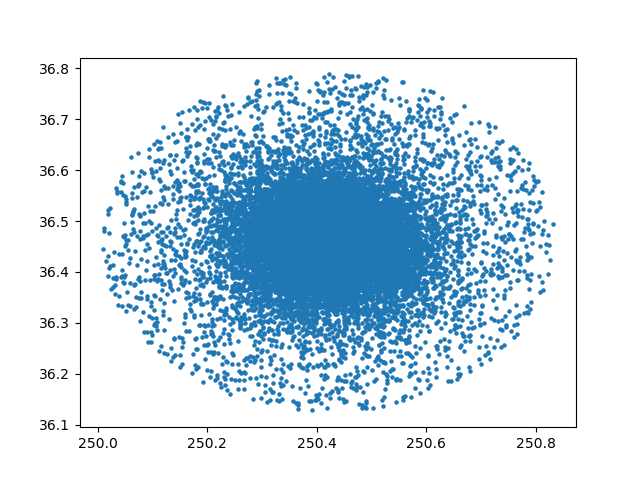

In [23]:

%matplotlib notebook 
plt.scatter(gaia_2.ra, gaia_2.dec, s = 5)

🧐 To plot an HR diagram, we need to convert the apparent magnitudes to absolute magnitudes, which we did using the following function: 

M = m - 5log(distance) + 5 

where m is the apparent magnitude, the distance is in parsecs, and the M is the absolute magnitude. 

In [24]:
#functions to calculate absolute magnitudes ! 

def calc_absmag_g():
    
    absmag = gaia_2.phot_g_mean_mag - 5*np.log10(gaia_2.distances*1000)+5
    
    return absmag 

def calc_absmag_bp():
    
    absmagbp = gaia_2.phot_bp_mean_mag - 5*np.log10(gaia_2.distances*1000)+5
    
    return absmagbp

def calc_absmag_rp():

    absmagrp = gaia_2.phot_rp_mean_mag - 5*np.log10(gaia_2.distances*1000)+5
    
    return absmagrp

#adding columns to the gaia dataset with the absolute magnitudes 
gaia_2['M_g'] = calc_absmag_g()
gaia_2['M_bp'] = calc_absmag_bp()
gaia_2['M_rp'] = calc_absmag_rp()

In [25]:
gaia_2

,ra,ra_error,dec,dec_error,parallax,parallax_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,distances,M_g,M_bp,M_rp
0,250.210403,0.155934,36.506006,0.179071,0.872153,0.201508,18.970665,19.559586,18.175150,1.384436,0.588921,0.795515,1.146587,8.673629,9.262550,7.878114
1,250.233695,0.165174,36.519477,0.193368,0.089205,0.214014,19.038458,19.216787,18.547806,0.668982,0.178329,0.490652,11.210128,3.790405,3.968734,3.299753
2,250.433752,0.457370,36.539471,0.453590,0.752001,0.530961,20.140720,19.898542,19.235739,0.662804,-0.242178,0.904982,1.329785,9.521812,9.279634,8.616831
3,250.514669,0.148344,36.346602,0.182498,0.201993,0.202575,18.593836,18.786358,18.118933,0.667425,0.192522,0.474903,4.950668,5.120517,5.313039,4.645614
4,250.757883,0.314347,36.595053,0.379377,0.645419,0.409077,19.861362,20.309706,19.060225,1.249481,0.448343,0.801138,1.549381,8.910571,9.358915,8.109434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16041,250.213732,0.267580,36.637694,0.308502,1.673577,0.346489,19.686330,20.967340,18.437843,2.529497,1.281010,1.248487,0.597523,10.804558,12.085568,9.556071
16042,250.365140,0.597345,36.589396,0.669289,0.250989,0.838290,20.649916,20.772890,20.127192,0.645699,0.122974,0.522724,3.984242,7.648187,7.771161,7.125463
16043,250.328326,0.265317,36.603832,0.285100,0.990049,0.333307,19.676842,19.887138,19.227903,0.659235,0.210297,0.448938,1.010051,9.655126,9.865422,9.206187
16044,250.211912,0.503066,36.589667,0.578281,0.058116,0.660381,20.507488,20.696276,19.938790,0.757486,0.188787,0.568699,17.206836,4.328983,4.517771,3.760285


😎 Here, we got another visualization of the M13 cluster by plotting the color g_rp against the absolute magnitude of g 

<IPython.core.display.Javascript object>


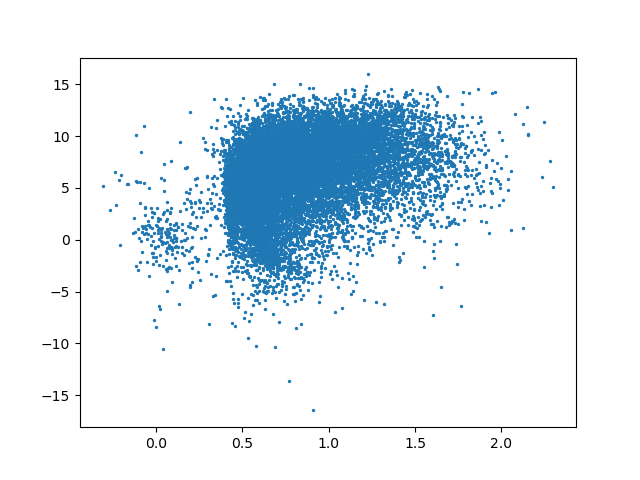

In [26]:
%matplotlib notebook 
plt.scatter(gaia_2.g_rp, gaia_2.M_g, s =2)

😱 2D HR diagram by plotting a color (g_rp) against its absolute magnitude (M_g) 

<IPython.core.display.Javascript object>


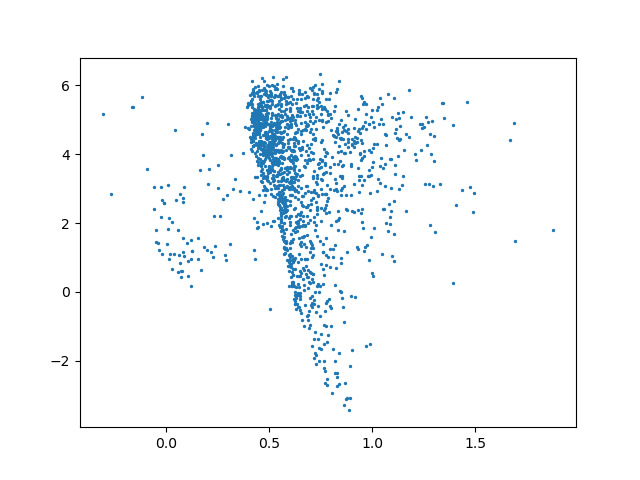

In [27]:


%matplotlib notebook 
filtergaia_2 = gaia_2[gaia_2.distances<gaia_2.distances.max()]
filtergaia_2 = filtergaia_2[filtergaia_2.distances>0]
filtergaia_2 = filtergaia_2[filtergaia_2.distances<6.8+3]
filtergaia_2 = filtergaia_2[filtergaia_2.distances>6.8-3]
filtergaia_2 = filtergaia_2[filtergaia_2.parallax/filtergaia_2.parallax_error>1]
plt.scatter(filtergaia_2.g_rp, filtergaia_2.M_g, s =2) 

😌 That same HR diagram but in 3D 

<IPython.core.display.Javascript object>


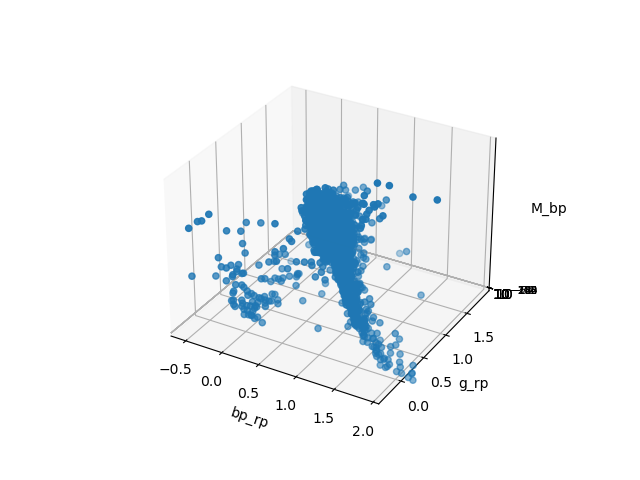

Text(0.5, 0, 'M_bp')

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(filtergaia_2.bp_rp, filtergaia_2.g_rp, filtergaia_2.M_bp)
ax.set_zscale('log') 

ax.set_xlabel('bp_rp')
ax.set_ylabel('g_rp')
ax.set_zlabel('M_bp')

### From here, we started clustering our stars using unsupervised machine learning, which is when the computer classifes the stars or you based on distinctions it makes - we as programmers don't know what distinctions the computer is making. 

### First, we used the KMeans clustering algorithm to get the clustered HR Diagram below. 

In [29]:
from sklearn.cluster import KMeans 

In [30]:
kmeans = KMeans(n_clusters = 2)

In [31]:
kmeans.fit(filtergaia_2[["bp_rp", "g_rp", "M_bp"]])

KMeans(n_clusters=2)

In [32]:
len(kmeans.labels_)
#(np.isfinite(filtergaia_2[["bp_rp", "g_rp", "M_bp"]]).sum())


1555

<IPython.core.display.Javascript object>


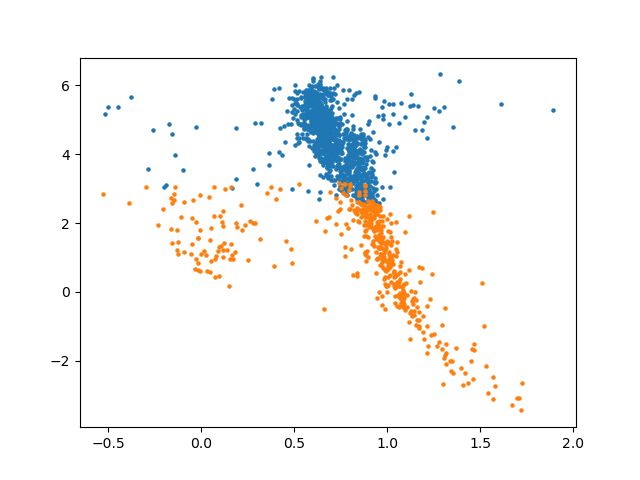

In [33]:
#clustering 
%matplotlib notebook 
for i in range(2):
    cluster = filtergaia_2[kmeans.labels_ == i]
    plt.scatter(cluster.bp_rp, cluster.M_g, s =5)
    
    

### Here, we did some unsupervised machine learning using spectral clustering 

In [47]:
from sklearn.cluster import SpectralClustering 

In [48]:
spectral = SpectralClustering(n_clusters = 2, n_components = 4, gamma = 0.01)

In [49]:
spectral.fit(filtergaia_2[["bp_rp", "g_rp", "M_bp"]])

SpectralClustering(gamma=0.01, n_clusters=2, n_components=4)

<IPython.core.display.Javascript object>


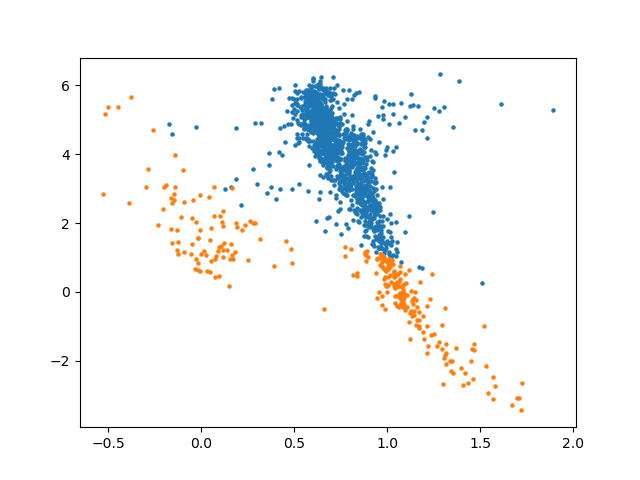

In [50]:

%matplotlib notebook 
for i in range(2):
    cluster = filtergaia_2[spectral.labels_ == i]
    plt.scatter(cluster.bp_rp, cluster.M_g, s = 5)

In [68]:
from sklearn.cluster import AgglomerativeClustering

In [69]:
agg = AgglomerativeClustering(n_clusters = 2)
agg.fit(filtergaia_2[["bp_rp", "g_rp", "M_bp"]])

AgglomerativeClustering()

In [70]:
agg.labels_


array([1, 0, 0, ..., 0, 0, 0])

<IPython.core.display.Javascript object>


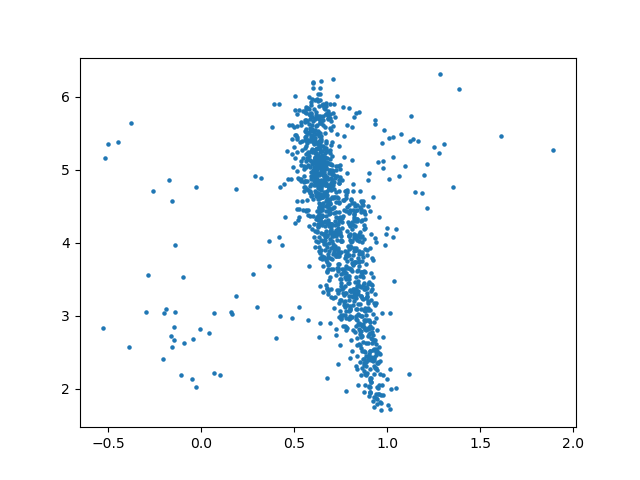

AttributeError: 'DataFrame' object has no attribute 'labels_'

In [71]:
%matplotlib notebook 
for i in range(2):
    agg = filtergaia_2[agg.labels_ == i]
    plt.scatter(agg.bp_rp, agg.M_g, s = 5)

#### This should've gone a bit before all of this, but here's the globular cluster in 3D 

<IPython.core.display.Javascript object>


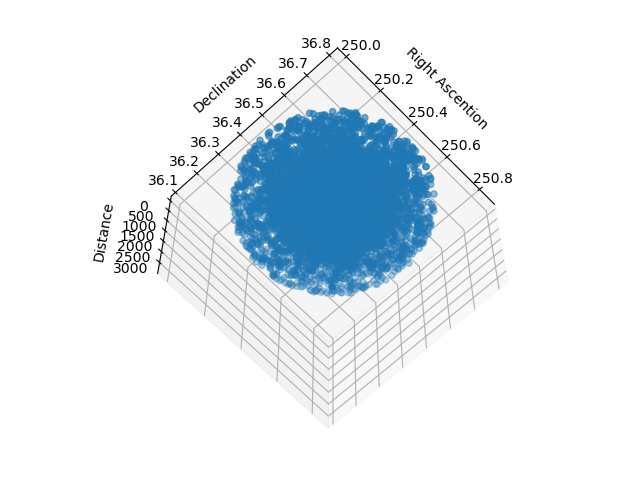

Text(0.5, 0, 'Distance')

In [87]:
#M13 globular cluster - this time in 3D (plotting the right ascention vs declination vs distance)

from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure() 
ax = fig.add_subplot(111, projection = '3d')
filtergaia_2 = gaia_2[gaia_2.distances<gaia_2.distances.max()]

ax.scatter(filtergaia_2.ra, filtergaia_2.dec, filtergaia_2.distances)

ax.set_xlabel('Right Ascention')
ax.set_ylabel('Declination')
ax.set_zlabel('Distance')